In [ ]:
# Install required packages
!pip install pandas numpy matplotlib requests ta tqdm pandas-datareader

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=8ea6197ae75a54d0d2efd6cda150284241f2ce8fe7fd302a59fac1825c0f2708
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


Fetching data for SPY...
Retrieved 6392 days of data for SPY


Backtesting symbols:   0%|          | 0/88 [00:00<?, ?it/s]


Processing AAPL...
Fetching data for AAPL...
Retrieved 6392 days of data for AAPL

--- AAPL Performance Summary ---
Total Return: 560.48%
Annualized Return: 8.14%
Max Drawdown: -3.58%
Win Rate: 49.78%
Profit Factor: 2.41
Sharpe Ratio: 5.92
Number of Trades: 462

Processing MSFT...
Fetching data for MSFT...
Retrieved 6392 days of data for MSFT

--- MSFT Performance Summary ---
Total Return: 192.76%
Annualized Return: 4.55%
Max Drawdown: -5.13%
Win Rate: 43.67%
Profit Factor: 1.88
Sharpe Ratio: 4.42
Number of Trades: 403

Processing GOOGL...
Fetching data for GOOGL...
Retrieved 5187 days of data for GOOGL

--- GOOGL Performance Summary ---
Total Return: 253.08%
Annualized Return: 6.64%
Max Drawdown: -4.37%
Win Rate: 47.01%
Profit Factor: 2.16
Sharpe Ratio: 5.42
Number of Trades: 385

Processing AMZN...
Fetching data for AMZN...
Retrieved 6392 days of data for AMZN

--- AMZN Performance Summary ---
Total Return: 527.33%
Annualized Return: 7.98%
Max Drawdown: -6.97%
Win Rate: 46.71%
Profi

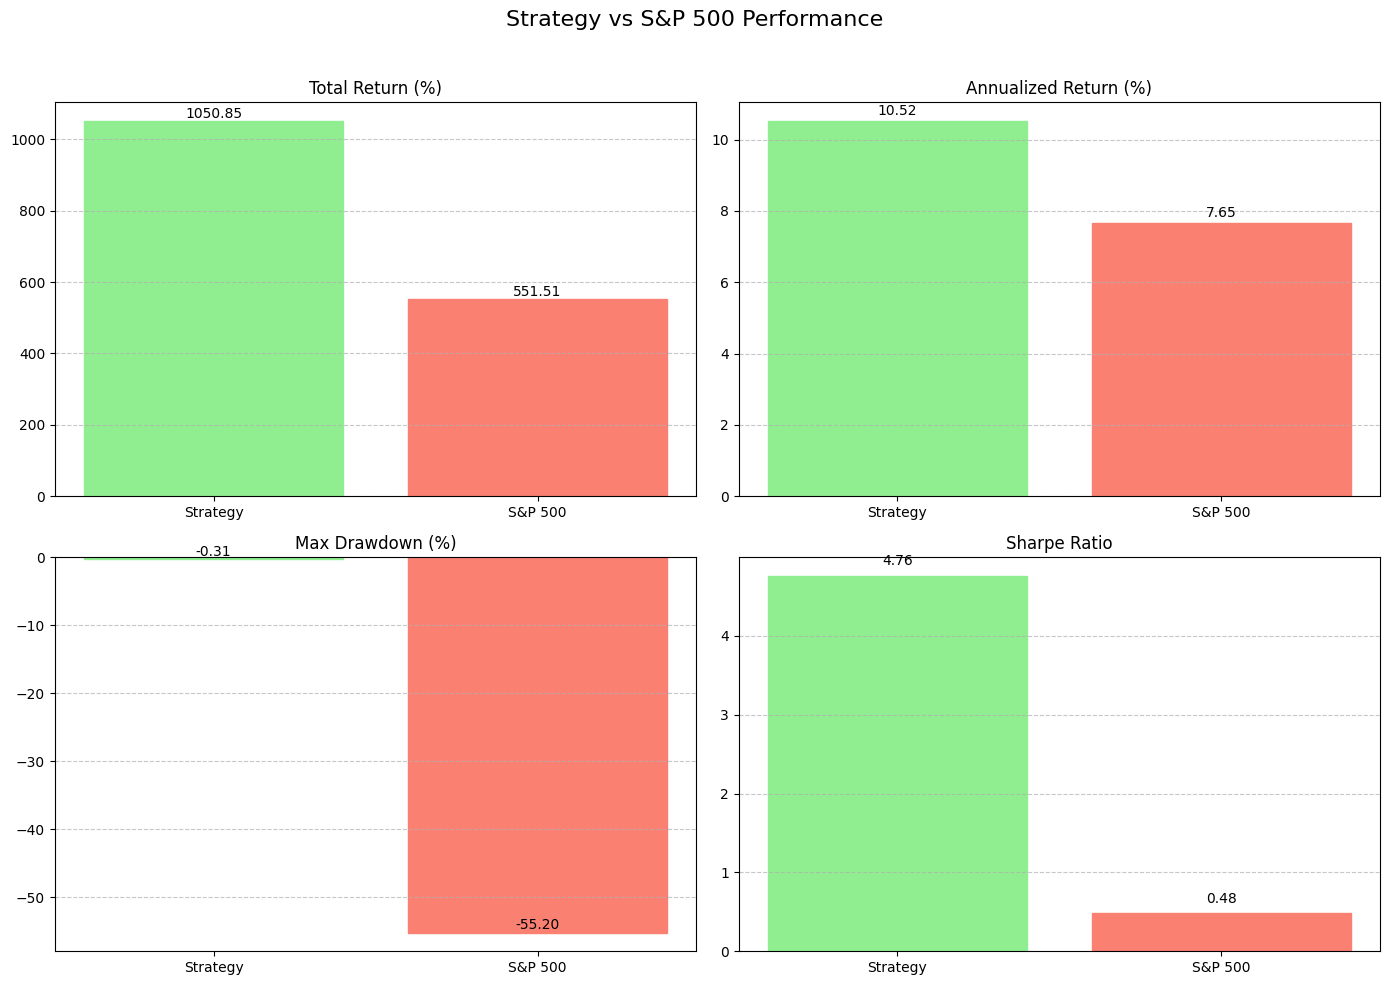

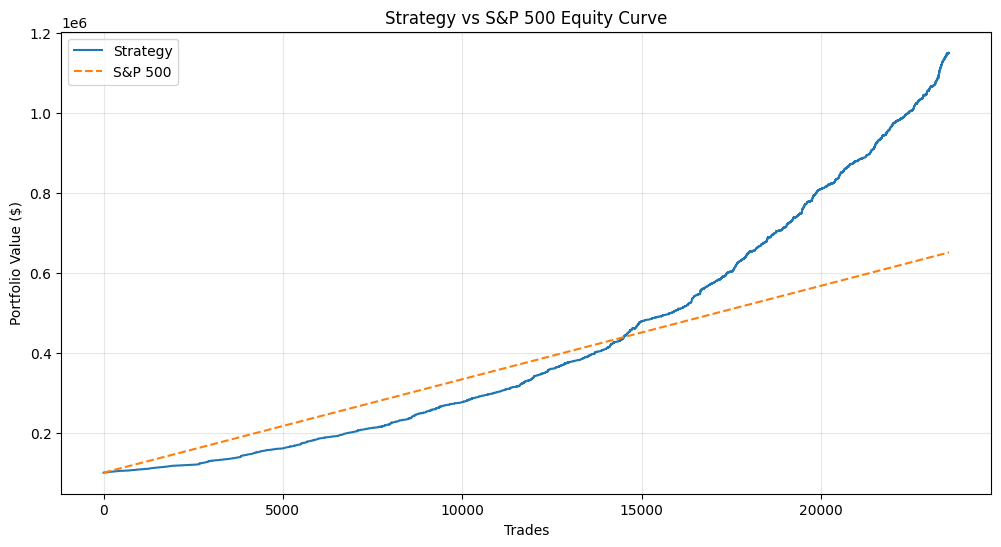


--- Current Best Trading Opportunities ---
1. BUY AROC at $26.24 | Signal Strength: 1.00 | Stop Loss: $25.44 | Take Profit: $28.24
2. SELL CROX at $106.20 | Signal Strength: 1.00 | Stop Loss: $110.79 | Take Profit: $94.73
3. SELL FSLR at $126.43 | Signal Strength: 1.00 | Stop Loss: $132.07 | Take Profit: $112.34
4. SELL LEN at $114.78 | Signal Strength: 0.70 | Stop Loss: $118.39 | Take Profit: $105.76
5. SELL LNW at $86.61 | Signal Strength: 0.70 | Stop Loss: $90.34 | Take Profit: $77.28

--- Detailed Performance by Symbol ---


,initial_capital,final_capital,total_return,annualized_return,max_drawdown,win_rate,avg_win,avg_loss,profit_factor,sharpe_ratio,trade_count,equity_curve,symbol
0,100000,6.604775e+05,560.477452,8.142834,-3.581000,0.497835,6.357035,-2.615219,2.409830,5.915256,462.0,"[100000, 100606.20756547042, 98976.69146731489...",AAPL
1,100000,2.927624e+05,192.762365,4.553552,-5.126264,0.436725,5.106247,-2.108200,1.877918,4.415977,403.0,"[100000, 103499.581736737, 107331.86035392256,...",MSFT
2,100000,3.530837e+05,253.083663,6.641345,-4.371607,0.470130,5.050671,-2.079163,2.155306,5.424946,385.0,"[100000, 99472.44897959183, 100808.51021137, 1...",GOOGL
3,100000,6.273308e+05,527.330800,7.977125,-6.973321,0.467120,7.090765,-2.805809,2.215309,4.882854,441.0,"[100000, 101208.95522388059, 99158.46015269664...",AMZN
4,100000,3.155793e+05,215.579337,10.192120,-4.557671,0.482456,6.665987,-2.566382,2.421329,5.794331,228.0,"[100000, 99295.42086544161, 98766.46848979009,...",META
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,100000,1.605243e+05,60.524289,8.069408,-7.673740,0.432000,8.632188,-3.746821,1.752239,3.292627,125.0,"[100000, 102178.1561461794, 101050.31263721263...",WHD
86,100000,2.400036e+05,140.003637,9.833200,-4.569366,0.496599,7.654898,-3.228985,2.338646,5.673589,147.0,"[100000, 101600.69280737598, 100999.4947321849...",WMS
87,100000,1.219687e+06,1119.687095,11.014447,-13.617705,0.496815,11.765274,-4.486860,2.588970,5.090443,314.0,"[100000, 108542.76895943562, 103715.3951377895...",WT
88,100000,1.150849e+06,1050.849025,10.517415,-0.313226,0.463640,7.874742,-3.174829,2.144079,4.758885,23570.0,"[100000, 100013.77744466979, 99976.9610691455,...",Portfolio


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from datetime import datetime, timedelta
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from tqdm.notebook import tqdm

# Alpha Vantage API configuration
ALPHA_VANTAGE_API_KEY = 'Insert Key Here'
SYMBOLS = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'MGK', 'VOO', 'ACLS', 'ACMR', 'AMP', 'APO', 'AROC', 'ATAT', 'BJ', 'BLDR', 'BOOT', 'BYD', 'CARR', 'CEG', 'CLS', 'CNX', 'COCO', 'CRC', 'CROX', 'DELL', 'DHI', 'DKS', 'FIX', 'FLEX', 'FLR', 'FSLR', 'FUTU', 'GDDY', 'GFF', 'GGAL', 'GLNG', 'HALO', 'HCA', 'HUBB', 'IBKR', 'INTR', 'JBL', 'JEF', 'KKR', 'LEN', 'LNTH', 'LNW', 'LPLA', 'LPX', 'LRN', 'MBC', 'MCK', 'META', 'NVT', 'OC', 'OLLI', 'ON', 'OPCH', 'OPRA', 'PDD', 'PGR', 'PH', 'PHM', 'PPC', 'PR', 'PRIM', 'RBC', 'REGN', 'RMBS', 'SBLK', 'SFM', 'SIG', 'STLD', 'TBBK', 'TECK', 'TGLS', 'TMUS', 'TOL', 'TSCO', 'TSM', 'URI', 'UTHR', 'WAB', 'WCC', 'WFRD', 'WHD', 'WMS', 'WT']
INITIAL_CAPITAL = 100000
MAX_POSITIONS = 5  # Maximum number of positions to hold at once

# Fetch historical data with rate limit handling
def get_historical_data(symbol, outputsize='full'):
    print(f"Fetching data for {symbol}...")
    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={symbol}&outputsize={outputsize}&apikey={ALPHA_VANTAGE_API_KEY}"

    response = requests.get(url)
    data = response.json()

    # Handle API rate limits
    if "Note" in data and "call frequency" in data["Note"]:
        print("API rate limit reached. Waiting 60 seconds...")
        time.sleep(61)
        return get_historical_data(symbol, outputsize)

    if "Time Series (Daily)" not in data:
        print(f"Error retrieving data for {symbol}: {data}")
        return None

    # Process data
    time_series = data["Time Series (Daily)"]
    df = pd.DataFrame.from_dict(time_series, orient='index')

    # Rename columns
    df = df.rename(columns={
        '1. open': 'open',
        '2. high': 'high',
        '3. low': 'low',
        '4. close': 'close',
        '5. adjusted close': 'adjusted_close',
        '6. volume': 'volume'
    })

    # Convert to numeric
    for col in df.columns:
        df[col] = pd.to_numeric(df[col])

    # Sort by date and set index
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()

    print(f"Retrieved {len(df)} days of data for {symbol}")
    time.sleep(12)  # Respect API limits

    return df

# Calculate momentum and technical features
def calculate_features(df):
    # Price DataFrame
    df_feat = pd.DataFrame(index=df.index)
    df_feat['close'] = df['close']
    df_feat['adjusted_close'] = df['adjusted_close']
    df_feat['volume'] = df['volume']

    # Core Momentum Indicators (3, 6, 9, 12 month returns)
    for month in [1, 3, 6, 9, 12]:
        days = month * 21  # Approximate trading days per month
        df_feat[f'momentum_{month}m'] = df['adjusted_close'].pct_change(days)

    # Volatility - rolling standard deviation
    for window in [21, 63, 126]:  # 1, 3, 6 months
        df_feat[f'volatility_{window}d'] = df['adjusted_close'].pct_change().rolling(window).std()

    # Moving Averages
    for ma in [20, 50, 100, 200]:
        df_feat[f'ma_{ma}d'] = df['adjusted_close'].rolling(ma).mean()
        # Moving Average Direction
        df_feat[f'ma_{ma}d_direction'] = np.where(df_feat[f'ma_{ma}d'].diff() > 0, 1, -1)
        # Price relative to Moving Average
        df_feat[f'price_to_ma_{ma}d'] = df['adjusted_close'] / df_feat[f'ma_{ma}d'] - 1

    # Volume indicators
    df_feat['volume_change'] = df['volume'].pct_change()
    df_feat['volume_ma_20d'] = df['volume'].rolling(20).mean()
    df_feat['relative_volume'] = df['volume'] / df_feat['volume_ma_20d']

    # Trend strength (ADX-like)
    df_feat['trend_strength'] = df_feat['momentum_3m'].abs() / df_feat['volatility_63d']

    # Regime based on crosses of long and short moving averages
    df_feat['ma_regime'] = np.where(df_feat['ma_50d'] > df_feat['ma_200d'], 1, -1)

    # Return the features
    return df_feat.dropna()

# Calculate dynamic stop loss and take profit levels based on volatility
def calculate_adaptive_risk_params(df, risk_factor=1.0):
    # Calculate volatility - ATR-like measure
    high_low = df['high'] - df['low']
    high_close = np.abs(df['high'] - df['close'].shift())
    low_close = np.abs(df['low'] - df['close'].shift())
    ranges = pd.concat([high_low, high_close, low_close], axis=1)
    true_range = ranges.max(axis=1)
    atr = true_range.rolling(14).mean()

    # Calculate adaptive stop loss and take profit
    stop_loss_pct = atr / df['close'] * risk_factor
    take_profit_pct = stop_loss_pct * 2.5  # Reward-to-risk ratio of 2.5

    return pd.DataFrame({
        'stop_loss_pct': stop_loss_pct,
        'take_profit_pct': take_profit_pct
    })

# Train machine learning model for regime identification
def train_ml_model(df_features):
    # Create target: next month's return > 0
    df_ml = df_features.copy()
    df_ml['target'] = np.where(df_ml['close'].shift(-21) > df_ml['close'], 1, 0)

    # Feature selection
    feature_cols = [col for col in df_ml.columns if col not in ['close', 'adjusted_close', 'target']]
    features = df_ml[feature_cols].copy()
    target = df_ml['target']

    # Handle missing values
    features = features.replace([np.inf, -np.inf], np.nan).dropna()

    # Keep only records with both features and target
    valid_indices = features.index.intersection(target.dropna().index)
    features = features.loc[valid_indices]
    target = target.loc[valid_indices]

    # Standardize features
    scaler = StandardScaler()
    features_scaled = pd.DataFrame(
        scaler.fit_transform(features),
        index=features.index,
        columns=features.columns
    )

    # Train-test split with time series cross-validation
    tscv = TimeSeriesSplit(n_splits=5)

    # Initialize model
    model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train on last fold to get most recent model
    for train_idx, test_idx in tscv.split(features_scaled):
        X_train, X_test = features_scaled.iloc[train_idx], features_scaled.iloc[test_idx]
        y_train, y_test = target.iloc[train_idx], target.iloc[test_idx]

    model.fit(X_train, y_train)

    # Return model, scaler, and feature columns
    return model, scaler, feature_cols

# Generate trading signals based on momentum, regime, and ML prediction
def generate_signals(df_features, df_risk, model, scaler, feature_cols):
    # Prepare features for prediction
    df_pred = df_features.copy()
    X = df_pred[feature_cols].replace([np.inf, -np.inf], np.nan).dropna()
    X_scaled = pd.DataFrame(
        scaler.transform(X),
        index=X.index,
        columns=feature_cols
    )

    # Make predictions
    try:
        predictions = model.predict_proba(X_scaled)[:, 1]  # Probability of positive return
        df_pred.loc[X.index, 'ml_signal'] = np.where(predictions > 0.55, 1, np.where(predictions < 0.45, -1, 0))
    except:
        df_pred['ml_signal'] = 0

    # Core momentum signal
    df_pred['momentum_signal'] = 0
    # Strong momentum: multiple timeframes agree
    momentum_up = ((df_pred['momentum_3m'] > 0) &
                  (df_pred['momentum_6m'] > 0) &
                  (df_pred['momentum_12m'] > 0))
    momentum_down = ((df_pred['momentum_3m'] < 0) &
                    (df_pred['momentum_6m'] < 0) &
                    (df_pred['momentum_12m'] < 0))
    df_pred.loc[momentum_up, 'momentum_signal'] = 1
    df_pred.loc[momentum_down, 'momentum_signal'] = -1

    # Moving average signal
    df_pred['ma_signal'] = 0
    df_pred.loc[(df_pred['ma_50d'] > df_pred['ma_200d']) &
                (df_pred['price_to_ma_20d'] > -0.05) &
                (df_pred['price_to_ma_20d'] < 0.1), 'ma_signal'] = 1
    df_pred.loc[(df_pred['ma_50d'] < df_pred['ma_200d']) &
                (df_pred['price_to_ma_20d'] < 0.05) &
                (df_pred['price_to_ma_20d'] > -0.1), 'ma_signal'] = -1

    # Volatility adjustment
    df_pred['volatility_regime'] = np.where(
        df_pred['volatility_21d'] < df_pred['volatility_63d'].rolling(252).mean(),
        1, -1
    )

    # Combined signal (weighted approach)
    df_pred['combined_signal'] = (
        df_pred['momentum_signal'] * 0.4 +
        df_pred['ma_signal'] * 0.3 +
        df_pred['ml_signal'] * 0.3
    )

    # Final trade signal with thresholds
    df_pred['signal'] = 0
    df_pred.loc[df_pred['combined_signal'] >= 0.3, 'signal'] = 1
    df_pred.loc[df_pred['combined_signal'] <= -0.3, 'signal'] = -1

    # Adjust position sizing based on volatility
    position_size = 1.0 - (df_pred['volatility_21d'] / df_pred['volatility_21d'].rolling(252).max()).clip(0.3, 0.8)
    df_pred['position_size'] = position_size.fillna(0.5)  # Default to 50% when no data

    # Combine signals with risk parameters
    signals_with_risk = pd.concat([
        df_pred[['signal', 'position_size', 'combined_signal']],  # Added combined_signal for ranking
        df_risk
    ], axis=1).dropna()

    return signals_with_risk

# Backtest the strategy
def backtest_strategy(symbol, df_price, signals):
    trades = []
    positions = []

    # Initial state
    position = 0  # No position
    entry_price = 0
    stop_loss = 0
    take_profit = 0
    position_size = 0

    # Loop through each trading day
    for i in range(1, len(signals)):
        date = signals.index[i]
        signal = signals['signal'].iloc[i]
        current_price = df_price.loc[date, 'close']

        # Check for stop loss or take profit on existing position
        if position != 0:
            if position > 0 and current_price <= stop_loss:
                # Stop loss hit for long position
                exit_return = (stop_loss / entry_price - 1) * 100
                trades.append({
                    'symbol': symbol,
                    'entry_date': entry_date,
                    'exit_date': date,
                    'entry_price': entry_price,
                    'exit_price': stop_loss,
                    'position_size': position_size,
                    'return': exit_return,
                    'return_adjusted': exit_return * position_size,
                    'exit_type': 'stop_loss'
                })
                position = 0

            elif position > 0 and current_price >= take_profit:
                # Take profit hit for long position
                exit_return = (take_profit / entry_price - 1) * 100
                trades.append({
                    'symbol': symbol,
                    'entry_date': entry_date,
                    'exit_date': date,
                    'entry_price': entry_price,
                    'exit_price': take_profit,
                    'position_size': position_size,
                    'return': exit_return,
                    'return_adjusted': exit_return * position_size,
                    'exit_type': 'take_profit'
                })
                position = 0

            elif position < 0 and current_price >= stop_loss:
                # Stop loss hit for short position
                exit_return = (entry_price / stop_loss - 1) * 100
                trades.append({
                    'symbol': symbol,
                    'entry_date': entry_date,
                    'exit_date': date,
                    'entry_price': entry_price,
                    'exit_price': stop_loss,
                    'position_size': position_size,
                    'return': exit_return,
                    'return_adjusted': exit_return * position_size,
                    'exit_type': 'stop_loss'
                })
                position = 0

            elif position < 0 and current_price <= take_profit:
                # Take profit hit for short position
                exit_return = (entry_price / take_profit - 1) * 100
                trades.append({
                    'symbol': symbol,
                    'entry_date': entry_date,
                    'exit_date': date,
                    'entry_price': entry_price,
                    'exit_price': take_profit,
                    'position_size': position_size,
                    'return': exit_return,
                    'return_adjusted': exit_return * position_size,
                    'exit_type': 'take_profit'
                })
                position = 0

        # Check for signal-based entries or exits
        if position == 0 and signal == 1:
            # Enter long position
            position = 1
            entry_price = current_price
            entry_date = date
            position_size = signals['position_size'].iloc[i]
            stop_loss = entry_price * (1 - signals['stop_loss_pct'].iloc[i])
            take_profit = entry_price * (1 + signals['take_profit_pct'].iloc[i])
            positions.append({
                'date': date,
                'symbol': symbol,
                'position': 1,
                'price': entry_price,
                'size': position_size
            })

        elif position == 1 and signal == -1:
            # Exit long position based on signal
            exit_return = (current_price / entry_price - 1) * 100
            trades.append({
                'symbol': symbol,
                'entry_date': entry_date,
                'exit_date': date,
                'entry_price': entry_price,
                'exit_price': current_price,
                'position_size': position_size,
                'return': exit_return,
                'return_adjusted': exit_return * position_size,
                'exit_type': 'signal'
            })
            position = 0

        # Track daily position
        if position != 0:
            positions.append({
                'date': date,
                'symbol': symbol,
                'position': position,
                'price': current_price,
                'size': position_size
            })

    # Close any open position at the end of the period
    if position != 0:
        last_date = signals.index[-1]
        last_price = df_price.loc[last_date, 'close']

        if position > 0:
            exit_return = (last_price / entry_price - 1) * 100
        else:
            exit_return = (entry_price / last_price - 1) * 100

        trades.append({
            'symbol': symbol,
            'entry_date': entry_date,
            'exit_date': last_date,
            'entry_price': entry_price,
            'exit_price': last_price,
            'position_size': position_size,
            'return': exit_return,
            'return_adjusted': exit_return * position_size,
            'exit_type': 'end_of_period'
        })

    # Convert to DataFrames
    trades_df = pd.DataFrame(trades)
    positions_df = pd.DataFrame(positions)

    return trades_df, positions_df

# Calculate performance metrics
def calculate_performance(trades_df, initial_capital=INITIAL_CAPITAL):
    if trades_df.empty:
        return None

    # Calculate cumulative returns
    capital = initial_capital
    equity_curve = [initial_capital]

    for _, trade in trades_df.iterrows():
        trade_return = trade['return_adjusted'] / 100
        trade_capital = capital * trade['position_size']
        capital += trade_capital * trade_return
        equity_curve.append(capital)

    # Calculate performance metrics
    total_return = (capital / initial_capital - 1) * 100

    # Annualized return (assuming 252 trading days per year)
    days = (trades_df['exit_date'].max() - trades_df['entry_date'].min()).days
    years = days / 365
    annualized_return = ((1 + total_return/100) ** (1/years) - 1) * 100 if years > 0 else 0

    # Drawdown calculation
    equity_series = pd.Series(equity_curve)
    peak = equity_series.expanding().max()
    drawdown = (equity_series / peak - 1) * 100
    max_drawdown = drawdown.min()

    # Win rate and profit metrics
    winning_trades = trades_df[trades_df['return'] > 0]
    losing_trades = trades_df[trades_df['return'] <= 0]

    win_rate = len(winning_trades) / len(trades_df) if len(trades_df) > 0 else 0
    avg_win = winning_trades['return'].mean() if len(winning_trades) > 0 else 0
    avg_loss = losing_trades['return'].mean() if len(losing_trades) > 0 else 0

    profit_factor = abs(winning_trades['return'].sum() / losing_trades['return'].sum()) if len(losing_trades) > 0 and losing_trades['return'].sum() != 0 else float('inf')

    # Sharpe ratio (simplified, assuming risk-free rate of 0)
    returns_series = pd.Series([r/100 for r in trades_df['return_adjusted']])
    sharpe_ratio = (returns_series.mean() / returns_series.std()) * np.sqrt(252) if returns_series.std() > 0 else 0

    return {
        'initial_capital': initial_capital,
        'final_capital': capital,
        'total_return': total_return,
        'annualized_return': annualized_return,
        'max_drawdown': max_drawdown,
        'win_rate': win_rate,
        'avg_win': avg_win,
        'avg_loss': avg_loss,
        'profit_factor': profit_factor,
        'sharpe_ratio': sharpe_ratio,
        'trade_count': len(trades_df),
        'equity_curve': equity_curve
    }

# Get S&P 500 data and calculate buy-hold performance
def get_sp500_performance(initial_capital=INITIAL_CAPITAL):
    spy_data = get_historical_data('SPY')
    if spy_data is None:
        return None

    # Calculate buy and hold return
    start_price = spy_data['adjusted_close'].iloc[0]
    end_price = spy_data['adjusted_close'].iloc[-1]

    total_return = (end_price / start_price - 1) * 100

    # Calculate annualized return
    days = (spy_data.index[-1] - spy_data.index[0]).days
    years = days / 365
    annualized_return = ((1 + total_return/100) ** (1/years) - 1) * 100

    # Calculate drawdown
    spy_close = spy_data['adjusted_close']
    peak = spy_close.expanding().max()
    drawdown = (spy_close / peak - 1) * 100
    max_drawdown = drawdown.min()

    # Calculate Sharpe ratio (simplified)
    daily_returns = spy_close.pct_change().dropna()
    sharpe_ratio = (daily_returns.mean() / daily_returns.std()) * np.sqrt(252)

    return {
        'symbol': 'S&P 500 (SPY)',
        'initial_capital': initial_capital,
        'final_capital': initial_capital * (1 + total_return/100),
        'total_return': total_return,
        'annualized_return': annualized_return,
        'max_drawdown': max_drawdown,
        'sharpe_ratio': sharpe_ratio
    }

# Plot performance comparison
def plot_performance_comparison(strategy_performance, sp500_performance):
    # Create bar chart comparison
    metrics = ['total_return', 'annualized_return', 'max_drawdown', 'sharpe_ratio']
    labels = ['Total Return (%)', 'Annualized Return (%)', 'Max Drawdown (%)', 'Sharpe Ratio']

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle('Strategy vs S&P 500 Performance', fontsize=16)

    for i, (metric, label) in enumerate(zip(metrics, labels)):
        ax = axes[i//2, i%2]
        values = [strategy_performance[metric], sp500_performance[metric]]
        bars = ax.bar(['Strategy', 'S&P 500'], values)

        # Color coding
        if metric == 'max_drawdown':
            bars[0].set_color('salmon' if values[0] < values[1] else 'lightgreen')
            bars[1].set_color('lightgreen' if values[0] < values[1] else 'salmon')
        else:
            bars[0].set_color('lightgreen' if values[0] > values[1] else 'salmon')
            bars[1].set_color('salmon' if values[0] > values[1] else 'lightgreen')

        ax.set_title(label)
        ax.grid(axis='y', linestyle='--', alpha=0.7)

        # Add value labels
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                    f'{height:.2f}', ha='center', va='bottom')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # Plot equity curve if available
    if 'equity_curve' in strategy_performance:
        plt.figure(figsize=(12, 6))
        plt.plot(strategy_performance['equity_curve'], label='Strategy')

        # Create comparable S&P 500 curve
        spy_curve = [
            sp500_performance['initial_capital'] * (1 + sp500_performance['total_return']/100 * i/(len(strategy_performance['equity_curve'])-1))
            for i in range(len(strategy_performance['equity_curve']))
        ]
        plt.plot(spy_curve, label='S&P 500', linestyle='--')

        plt.title('Strategy vs S&P 500 Equity Curve')
        plt.xlabel('Trades')
        plt.ylabel('Portfolio Value ($)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

# New function to rank and select the best trading opportunities
def rank_trading_opportunities(all_signals_dict, current_date, max_positions=MAX_POSITIONS):
    """
    Rank and select the best trading opportunities across all symbols.

    Parameters:
    all_signals_dict: Dictionary with symbol as key and signals dataframe as value
    current_date: Date to evaluate signals for
    max_positions: Maximum number of positions to recommend

    Returns:
    List of dictionaries with trade recommendations
    """
    # Store all signals for the current date
    opportunities = []

    for symbol, signals_df in all_signals_dict.items():
        # Skip if no data for current date or no signals
        if current_date not in signals_df.index or signals_df.empty:
            continue

        # Get the row for current date
        row = signals_df.loc[current_date]

        # Only consider strong signals
        if row['signal'] != 0:
            opportunities.append({
                'symbol': symbol,
                'signal': row['signal'],  # 1 for buy, -1 for sell
                'strength': abs(row['combined_signal']),  # Signal strength
                'position_size': row['position_size'],
                'stop_loss_pct': row['stop_loss_pct'],
                'take_profit_pct': row['take_profit_pct']
            })

    # Rank opportunities by signal strength (descending)
    opportunities = sorted(opportunities, key=lambda x: x['strength'], reverse=True)

    # Take top N opportunities
    return opportunities[:max_positions]

# New Portfolio Manager class to track positions and generate trade decisions
class PortfolioManager:
    def __init__(self, initial_capital=INITIAL_CAPITAL, max_positions=MAX_POSITIONS):
        self.initial_capital = initial_capital
        self.current_capital = initial_capital
        self.max_positions = max_positions
        self.positions = {}  # symbol: {entry_price, size, stop_loss, take_profit}
        self.trade_history = []

    def get_available_capital(self):
        """Calculate remaining capital available for new trades"""
        allocated_capital = sum([
            self.current_capital * pos['size']
            for pos in self.positions.values()
        ])
        return self.current_capital - allocated_capital

    def get_position_count(self):
        """Get the number of active positions"""
        return len(self.positions)

    def can_enter_new_position(self):
        """Check if we can enter a new position"""
        return (
            self.get_position_count() < self.max_positions and
            self.get_available_capital() > 0
        )

    def enter_position(self, symbol, price, signal, position_size, stop_loss_pct, take_profit_pct):
        """Enter a new position"""
        # Skip if we already have this position
        if symbol in self.positions:
            return False

        # Calculate position size based on capital
        capital_allocation = self.current_capital * position_size / self.max_positions

        # Record the new position
        self.positions[symbol] = {
            'entry_price': price,
            'entry_date': datetime.now().strftime('%Y-%m-%d'),
            'size': position_size / self.max_positions,  # Normalize by max positions
            'direction': signal,  # 1 for long, -1 for short
            'stop_loss': price * (1 - stop_loss_pct * signal),  # Adjust for direction
            'take_profit': price * (1 + take_profit_pct * signal)  # Adjust for direction
        }

        # Log the trade
        self.trade_history.append({
            'date': datetime.now().strftime('%Y-%m-%d'),
            'action': 'BUY' if signal > 0 else 'SELL',
            'symbol': symbol,
            'price': price,
            'size': position_size / self.max_positions,
            'capital_allocation': capital_allocation
        })

        return True

    def exit_position(self, symbol, price, reason):
        """Exit an existing position"""
        if symbol not in self.positions:
            return False

        position = self.positions[symbol]

        # Calculate return based on direction
        if position['direction'] > 0:  # Long position
            pct_return = (price / position['entry_price'] - 1) * 100
        else:  # Short position
            pct_return = (position['entry_price'] / price - 1) * 100

        # Update capital based on return
        capital_adjustment = self.current_capital * position['size'] * pct_return / 100
        self.current_capital += capital_adjustment

        # Log the trade
        self.trade_history.append({
            'date': datetime.now().strftime('%Y-%m-%d'),
            'action': 'SELL' if position['direction'] > 0 else 'BUY_TO_COVER',
            'symbol': symbol,
            'price': price,
            'size': position['size'],
            'return_pct': pct_return,
            'return_amount': capital_adjustment,
            'reason': reason
        })

        # Remove the position
        del self.positions[symbol]

        return True

    def update_positions(self, current_prices, signals_dict):
        """
        Update positions based on current prices and signals.
        Returns list of actions taken.
        """
        actions = []

        # Check existing positions for exit conditions
        symbols_to_check = list(self.positions.keys())
        for symbol in symbols_to_check:
            if symbol not in current_prices:
                continue

            current_price = current_prices[symbol]
            position = self.positions[symbol]

            # Check for stop loss or take profit
            if position['direction'] > 0:  # Long position
                if current_price <= position['stop_loss']:
                    self.exit_position(symbol, position['stop_loss'], 'stop_loss')
                    actions.append(f"EXIT LONG {symbol} at stop loss {position['stop_loss']:.2f}")
                elif current_price >= position['take_profit']:
                    self.exit_position(symbol, position['take_profit'], 'take_profit')
                    actions.append(f"EXIT LONG {symbol} at take profit {position['take_profit']:.2f}")
            else:  # Short position
                if current_price >= position['stop_loss']:
                    self.exit_position(symbol, position['stop_loss'], 'stop_loss')
                    actions.append(f"EXIT SHORT {symbol} at stop loss {position['stop_loss']:.2f}")
                elif current_price <= position['take_profit']:
                    self.exit_position(symbol, position['take_profit'], 'take_profit')
                    actions.append(f"EXIT SHORT {symbol} at take profit {position['take_profit']:.2f}")

            # Check for signal-based exits
            if symbol in signals_dict and not signals_dict[symbol].empty:
                latest_date = signals_dict[symbol].index[-1]
                latest_signal = signals_dict[symbol].loc[latest_date, 'signal']

                # Exit if signal is opposite to position direction
                if position['direction'] * latest_signal < 0:
                    self.exit_position(symbol, current_price, 'signal_reversal')
                    actions.append(f"EXIT {symbol} at {current_price:.2f} due to signal reversal")

        return actions

    def get_trade_recommendations(self, ranked_opportunities, current_prices):
        """
        Generate trade recommendations based on ranked opportunities and current positions.
        Returns list of trade recommendations.
        """
        recommendations = []

        # First, check if we can enter new positions
        if not self.can_enter_new_position():
            return recommendations

        # Filter opportunities that we don't already have positions in
        available_opportunities = [op for op in ranked_opportunities if op['symbol'] not in self.positions]

        # Enter positions until we hit our maximum
        for opportunity in available_opportunities:
            if not self.can_enter_new_position():
                break

            symbol = opportunity['symbol']
            if symbol not in current_prices:
                continue

            current_price = current_prices[symbol]

            recommendations.append({
                'action': 'BUY' if opportunity['signal'] > 0 else 'SELL',
                'symbol': symbol,
                'price': current_price,
                'position_size': opportunity['position_size'] / self.max_positions,
                'stop_loss': current_price * (1 - opportunity['stop_loss_pct'] * opportunity['signal']),
                'take_profit': current_price * (1 + opportunity['take_profit_pct'] * opportunity['signal']),
                'strength': opportunity['strength']
            })

        return recommendations

# Main function to run the backtest and get trade recommendations
def run_advanced_strategy_backtest(num_symbols=5):
    # Lists to store results
    all_performances = []
    all_trades = []
    all_signals = {}  # Dictionary to store signals for each symbol
    latest_prices = {}  # Dictionary to store latest prices

    # Get S&P 500 performance
    sp500_performance = get_sp500_performance()

    # Create a progress bar for stocks
    for symbol in tqdm(SYMBOLS[:num_symbols], desc="Backtesting symbols"):
        print(f"\nProcessing {symbol}...")

        # Get price data
        df_price = get_historical_data(symbol)

        if df_price is None:
            print(f"Skipping {symbol} due to data retrieval issues")
            continue

        # Store latest price
        latest_prices[symbol] = df_price['close'].iloc[-1]

        # Calculate features and risk parameters
        df_features = calculate_features(df_price)
        df_risk = calculate_adaptive_risk_params(df_price)

        # Train ML model
        try:
            model, scaler, feature_cols = train_ml_model(df_features)

            # Generate signals
            signals = generate_signals(df_features, df_risk, model, scaler, feature_cols)
            all_signals[symbol] = signals  # Store signals for ranking

            # Backtest the strategy
            trades_df, positions_df = backtest_strategy(symbol, df_price, signals)

            # Calculate performance
            performance = calculate_performance(trades_df)

            if performance:
                performance['symbol'] = symbol
                all_performances.append(performance)
                all_trades.append(trades_df)

                # Print summary
                print(f"\n--- {symbol} Performance Summary ---")
                print(f"Total Return: {performance['total_return']:.2f}%")
                print(f"Annualized Return: {performance['annualized_return']:.2f}%")
                print(f"Max Drawdown: {performance['max_drawdown']:.2f}%")
                print(f"Win Rate: {performance['win_rate']*100:.2f}%")
                print(f"Profit Factor: {performance['profit_factor']:.2f}")
                print(f"Sharpe Ratio: {performance['sharpe_ratio']:.2f}")
                print(f"Number of Trades: {len(trades_df)}")

        except Exception as e:
            print(f"Error processing {symbol}: {e}")

    # Combine all trades and calculate portfolio performance
    if all_trades:
        portfolio_trades = pd.concat(all_trades)

        # Calculate proper portfolio performance with equal allocation across stocks
        num_processed_symbols = len(all_trades)
        allocation_per_symbol = 1.0 / num_processed_symbols

        # Adjust returns based on allocation
        portfolio_trades['return_adjusted'] = portfolio_trades['return'] * allocation_per_symbol

        portfolio_performance = calculate_performance(portfolio_trades)
        portfolio_performance['symbol'] = 'Portfolio'
        all_performances.append(portfolio_performance)

        # Add S&P 500 performance to results
        if sp500_performance:
            all_performances.append(sp500_performance)

        # Create performance DataFrame
        performance_df = pd.DataFrame(all_performances)

        # Print summary comparison
        print("\n--- Strategy vs S&P 500 Summary ---")
        print(f"Portfolio Strategy Return: {portfolio_performance['total_return']:.2f}% vs S&P 500 Return: {sp500_performance['total_return']:.2f}%")
        print(f"Strategy Outperformance: {portfolio_performance['total_return'] - sp500_performance['total_return']:.2f}%")
        print(f"Portfolio Strategy Max Drawdown: {portfolio_performance['max_drawdown']:.2f}% vs S&P 500 Max Drawdown: {sp500_performance['max_drawdown']:.2f}%")
        print(f"Annualized Portfolio Return: {portfolio_performance['annualized_return']:.2f}% vs Annualized S&P 500 Return: {sp500_performance['annualized_return']:.2f}%")

        # Plot performance comparison
        plot_performance_comparison(portfolio_performance, sp500_performance)

        # Get latest date for signals
        latest_date = max([signals.index[-1] for signals in all_signals.values() if not signals.empty])

        # Rank trading opportunities for the latest date
        best_opportunities = rank_trading_opportunities(all_signals, latest_date)

        # Initialize portfolio manager
        portfolio = PortfolioManager()

        # Get trade recommendations
        recommendations = portfolio.get_trade_recommendations(best_opportunities, latest_prices)

        print("\n--- Current Best Trading Opportunities ---")
        for i, rec in enumerate(recommendations, 1):
            print(f"{i}. {rec['action']} {rec['symbol']} at ${rec['price']:.2f} | " +
                  f"Signal Strength: {rec['strength']:.2f} | " +
                  f"Stop Loss: ${rec['stop_loss']:.2f} | " +
                  f"Take Profit: ${rec['take_profit']:.2f}")

        if not recommendations:
            print("No strong trading opportunities found for current date")

        return performance_df, portfolio_trades, recommendations

    return None, None, None

# Execute the strategy and get results
if __name__ == "__main__":
    # Run strategy on a subset of symbols for demonstration
    performance_results, all_trades, trade_recommendations = run_advanced_strategy_backtest(num_symbols=len(SYMBOLS))

    # Display full performance table
    if performance_results is not None:
        print("\n--- Detailed Performance by Symbol ---")
        display(performance_results)